# 4. Building Good Training Datasets

In [11]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


data_dict = {
    "col1": [1, 2, None, 4],
    "col2": [np.nan, 3, 4, 5],
    "col3": [10, 3, 7, 5],
}

df = pd.DataFrame(data_dict)

imp = SimpleImputer(missing_values=np.nan, strategy="mean")

data_imputed_np = imp.fit_transform(df.values)



df_imputed = pd.DataFrame(data=data_imputed_np, columns=df.columns)
df_imputed

,col1,col2,col3
0,1.000000,4.0,10.0
1,2.000000,3.0,3.0
2,2.333333,4.0,7.0
3,4.000000,5.0,5.0


In [46]:
from sklearn.preprocessing import OneHotEncoder
category_mapping = {"very old" : 0, "old" : 1, "new" : 2, "very new" : 3}

inverse_category_mapping = {value : key for key, value in category_mapping.items()}
category_mapping, inverse_category_mapping

labels = np.array(["very old", "new", "very new", "very old","very old","very old", "new", "old"])
labels = labels.reshape(-1,1)
print(np.unique(labels))
label_encoder = OneHotEncoder()
label_encoder.fit_transform(labels).todense()

['new' 'old' 'very new' 'very old']


matrix([[0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.]])

In [12]:
from sklearn.datasets import load_wine

data_bunch = load_wine()

data = np.column_stack([data_bunch.data, data_bunch.target])
columns = data_bunch.feature_names + ["target"]
df = pd.DataFrame(data=data, columns=columns)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

log_reg = LogisticRegression(penalty="l2", solver="lbfgs", multi_class="multinomial")
X,y = df.drop("target", axis=1), df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

log_reg.fit(X_train_std, y_train)

log_reg.score(X_train_std, y_train), log_reg.score(X_test_std, y_test)

(1.0, 0.9722222222222222)

<AxesSubplot:>

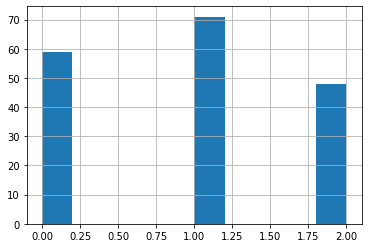

In [75]:
df["target"].hist()

In [9]:
from itertools import combinations

list(combinations(range(3),1))

features = [0,1,2,3]
all_combinations = [ [item for item in combinations(features,i)] for i in range(1,len(features)+1)]
all_combinations

[[(0,), (1,), (2,), (3,)],
 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)],
 [(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)],
 [(0, 1, 2, 3)]]

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df.drop("target", axis=1).values
y = df["target"].values
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2)

feat_labels = df.columns[:-1]
forest = RandomForestClassifier(n_estimators=500, random_state=42)
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

1.0

<BarContainer object of 13 artists>

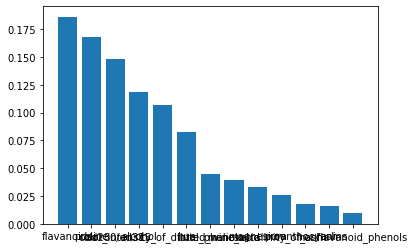

In [38]:
import matplotlib.pyplot as plt
a = zip(forest.feature_importances_, feat_labels)
a = list(a)
importances_sorted = sorted(a, key=lambda x: x[0], reverse=True)

plt.bar([x[1] for x in importances_sorted], [x[0] for x in importances_sorted])

<AxesSubplot:>

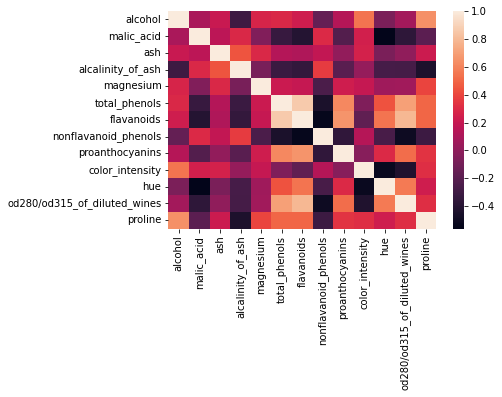

In [37]:
import seaborn as sns
sns.heatmap(df.drop("target", axis=1).corr())